# Project Overview

## Project Title
**Analyzing Health Risk Indicators and Predicting Insurance Premiums Using Statistical and Machine Learning Techniques**

## Objective
The primary objective of this project is to apply a combination of descriptive statistics, inferential statistics, and predictive modeling to analyze how health-related factors affect insurance premium pricing. Using a dataset of 986 individuals with multiple health indicators, we aim to:

1. **Explore** the data structure, distributions, and relationships between variables.
2. **Test hypotheses** about the impact of chronic conditions and surgeries on premium costs.
3. **Estimate confidence intervals** around population-level statistics.
4. **Build regression models** to predict premium prices.
5. **Classify individuals** as diabetic or non-diabetic using machine learning.
6. **Cluster individuals** into health risk segments using unsupervised learning.

## Skills Demonstrated
This project reflects core competencies developed throughout the course:

- Descriptive and inferential statistics
- Probability distribution modeling
- Confidence and prediction intervals
- Linear and Generalized Linear Models (GLMs)
- Hypothesis testing (means, proportions)
- Classification metrics: accuracy, precision, recall, AUROC
- Unsupervised learning using KMeans clustering
- Data visualization and interpretation
- End-to-end Python implementation using libraries such as:
  - `pandas`, `numpy`, `scipy`, `matplotlib`, `seaborn`, `sklearn`, `statsmodels`

## Methodology Overview

1. **Data Understanding**  
   Inspect dataset shape, types, and missing values. Use descriptive statistics and visualizations.

2. **Exploratory Data Analysis**  
   Visualize distributions, correlations, and relationships among features and target variable (`PremiumPrice`).

3. **Hypothesis Testing**  
   Test whether variables like `Diabetes`, `ChronicDiseases`, or `Surgeries` significantly impact premium cost.

4. **Regression Modeling**  
   Use linear regression and GLM to model `PremiumPrice` as a function of relevant health factors.

5. **Classification**  
   Build a random forest model to classify whether an individual is diabetic using health features.

6. **Clustering**  
   Apply KMeans to discover natural groupings in the population based on health and premium attributes.

## Expected Outcomes

- Identification of key factors that statistically and practically influence insurance premium cost.
- Accurate prediction models for premium pricing.
- Diagnostic tools for insurers to identify high-risk groups.
- Enhanced understanding of statistical foundations and their real-world application in health insurance analytics.


## Library Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="whitegrid")

# Dataset Overview

## Dataset Summary

- **Number of Rows (Observations):** 986  
- **Number of Columns (Features):** 11  
- **Data Type:** All columns are of integer type (`int64`), implying the dataset contains purely numerical values — likely binary flags or counts — suitable for statistical modeling and machine learning.

## Variable Descriptions

| Column Name                | Description                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| `Age`                      | Age of the individual (in years).                                           |
| `Diabetes`                 | Binary indicator of whether the individual has diabetes (1 = Yes, 0 = No).  |
| `BloodPressureProblems`    | Binary flag indicating blood pressure-related issues.                       |
| `AnyTransplants`           | Binary indicator for history of organ transplants.                          |
| `AnyChronicDiseases`       | Binary flag for chronic disease conditions (e.g., asthma, arthritis).       |
| `Height`                   | Height of the individual (in centimeters).                                  |
| `Weight`                   | Weight of the individual (in kilograms).                                    |
| `KnownAllergies`           | Binary flag for whether individual has known allergies.                     |
| `HistoryOfCancerInFamily` | Binary flag indicating family history of cancer.                            |
| `NumberOfMajorSurgeries`   | Count of major surgeries undergone by the individual.                       |
| `PremiumPrice`             | Annual health insurance premium (in local currency, likely INR).            |

## Key Characteristics

- The dataset is suitable for:
  - **Descriptive statistical analysis**
  - **Hypothesis testing**
  - **Regression modeling**
  - **Classification and clustering**
- No missing values or non-numeric entries are present, simplifying preprocessing.
- Binary columns can be treated as categorical features during modeling.

## Analytical Goals

- Understand which health indicators most strongly influence premium pricing.
- Test assumptions about health risks and insurance costs.
- Build models to predict premiums and health conditions.
- Cluster individuals into risk groups for potential policy segmentation.

In [3]:
df = pd.read_csv("Medicalpremium.csv")

print("Dataset Shape:", df.shape)
print("\nColumn Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (986, 11)

Column Types:
Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

Missing Values:
Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64


In [7]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


## 1. Descriptive and Exploratory Data Analysis

### Objective
To understand the basic structure, distribution, and central tendencies of the dataset variables.

### Key Concepts
- **Five Number Summary**: Minimum, Q1, Median, Q3, Maximum
- **Measures of Central Tendency**: Mean, Median, Mode
- **Measures of Dispersion**: Range, Interquartile Range (IQR), Standard Deviation, Variance

### Formulas
- **Mean**:  \( $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$ \)
- **Standard Deviation**: \( s = $\sqrt{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})^2}$ \)
- **IQR**:  \( $\text{IQR} = Q3 - Q1$ \)

We will use descriptive plots (histograms, boxplots, pairplots) and statistical summaries to visualize data distributions and identify potential outliers or skewness.


In [4]:
print("\nDescriptive Statistics:")
print(df.describe())
print("\nFive Number Summary:")
print(df.quantile([0, 0.25, 0.5, 0.75, 1]))


Descriptive Statistics:
         Age  Diabetes  BloodPressureProblems  AnyTransplants  \
count 986.00    986.00                 986.00          986.00   
mean   41.75      0.42                   0.47            0.06   
std    13.96      0.49                   0.50            0.23   
min    18.00      0.00                   0.00            0.00   
25%    30.00      0.00                   0.00            0.00   
50%    42.00      0.00                   0.00            0.00   
75%    53.00      1.00                   1.00            0.00   
max    66.00      1.00                   1.00            1.00   

       AnyChronicDiseases  Height  Weight  KnownAllergies  \
count              986.00  986.00  986.00          986.00   
mean                 0.18  168.18   76.95            0.22   
std                  0.38   10.10   14.27            0.41   
min                  0.00  145.00   51.00            0.00   
25%                  0.00  161.00   67.00            0.00   
50%                  0.

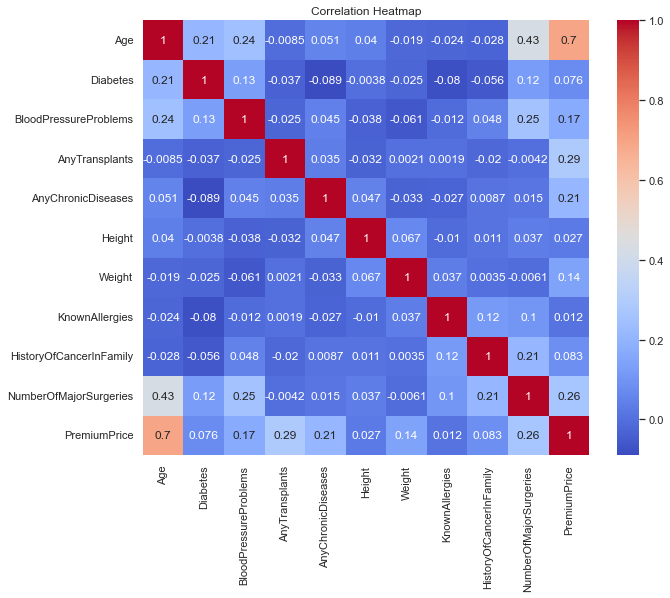

In [5]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

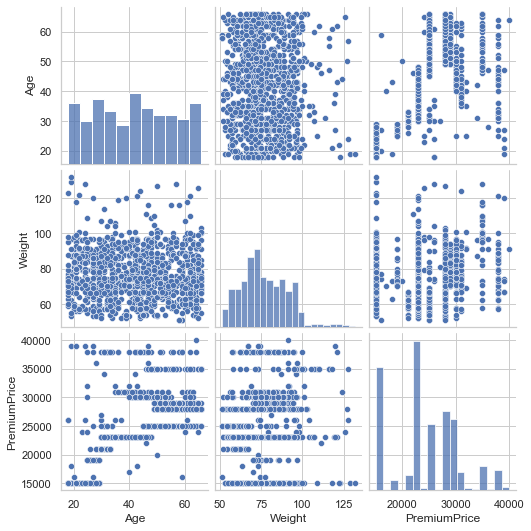

In [11]:
sns.pairplot(df[['Age', 'Weight', 'PremiumPrice']])
plt.show()

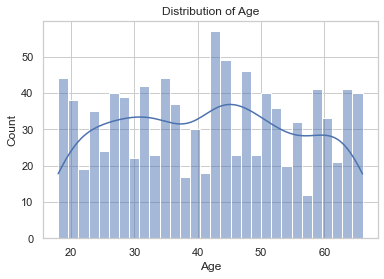

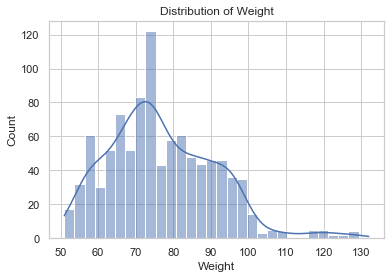

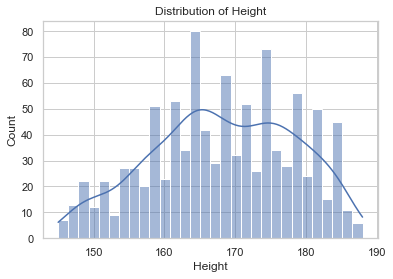

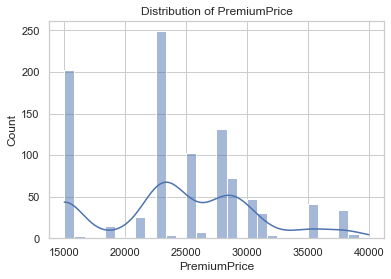

In [9]:
for col in ['Age', 'Weight', 'Height', 'PremiumPrice']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

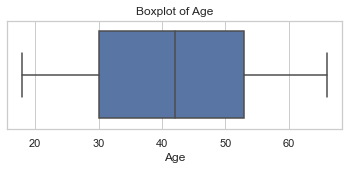

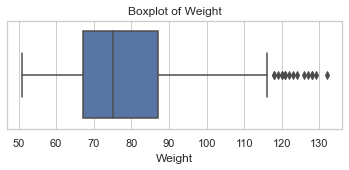

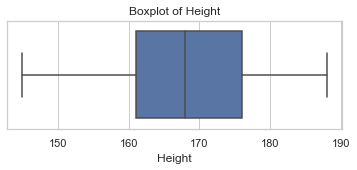

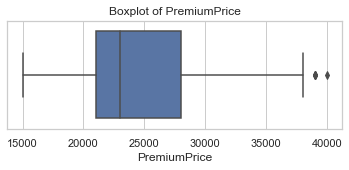

In [12]:
for col in ['Age', 'Weight', 'Height', 'PremiumPrice']:
    plt.figure(figsize=(6, 2))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

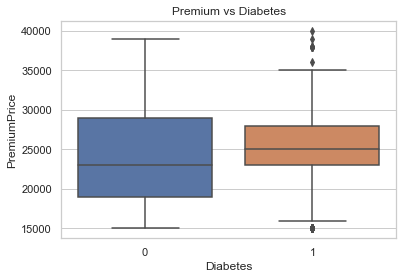

In [13]:
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

# Premium vs Diabetes
sns.boxplot(data=df, x='Diabetes', y='PremiumPrice')
plt.title('Premium vs Diabetes')
plt.show()

In [14]:
from scipy.stats import binom, poisson, norm

p_diabetes = df['Diabetes'].mean()
binom_prob = binom.pmf(3, 10, p_diabetes)
print(f"P(Exactly 3 of 10 people have Diabetes): {binom_prob:.4f}")

mu = df['PremiumPrice'].mean()
sigma = df['PremiumPrice'].std()
print("P(PremiumPrice > 30000):", 1 - norm.cdf(30000, mu, sigma))

P(Exactly 3 of 10 people have Diabetes): 0.1964
P(PremiumPrice > 30000): 0.18236497912412053


Estimated P(Diabetes): 0.42
P(Exactly 3 out of 10 people have Diabetes): 0.1964
P(Exactly 2 surgeries given lambda=0.67): 0.1142
Premium Mean: 24336.71, Standard Deviation: 6248.18
P(Premium > 30000): 0.1824


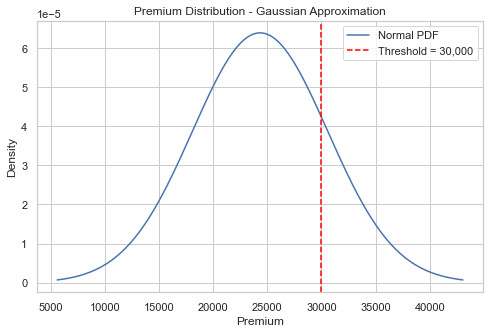

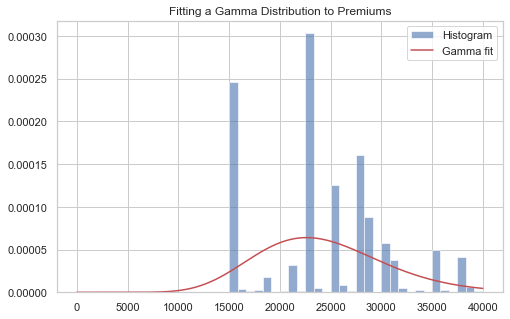

Gamma shape: 14.38, scale: 1692.83


In [22]:
from scipy.stats import binom, poisson, norm

# Binomial Distribution: Diabetes prevalence
p_diabetes = df['Diabetes'].mean()
print(f"Estimated P(Diabetes): {p_diabetes:.2f}")

binom_prob = binom.pmf(3, 10, p_diabetes)
print(f"P(Exactly 3 out of 10 people have Diabetes): {binom_prob:.4f}")

# Poisson Distribution: Approximate count events like surgeries
lambda_surgery = df['NumberOfMajorSurgeries'].mean()
poisson_prob = poisson.pmf(2, lambda_surgery)
print(f"P(Exactly 2 surgeries given lambda={lambda_surgery:.2f}): {poisson_prob:.4f}")

# Gaussian Distribution: Premium distribution
mu = df['PremiumPrice'].mean()
sigma = df['PremiumPrice'].std()
print(f"Premium Mean: {mu:.2f}, Standard Deviation: {sigma:.2f}")

# Probability of paying more than 30,000 in premium
p_above_30k = 1 - norm.cdf(30000, mu, sigma)
print(f"P(Premium > 30000): {p_above_30k:.4f}")

# Visual comparison
x_vals = np.linspace(mu - 3*sigma, mu + 3*sigma, 500)
y_vals = norm.pdf(x_vals, mu, sigma)
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='Normal PDF')
plt.axvline(30000, color='red', linestyle='--', label='Threshold = 30,000')
plt.title("Premium Distribution - Gaussian Approximation")
plt.xlabel("Premium")
plt.ylabel("Density")
plt.legend()
plt.show()

# Gamma Distribution fit
from scipy.stats import gamma
shape, loc, scale = gamma.fit(df['PremiumPrice'], floc=0)
x = np.linspace(0, df['PremiumPrice'].max(), 500)
plt.figure(figsize=(8, 5))
plt.hist(df['PremiumPrice'], bins=30, density=True, alpha=0.6, label='Histogram')
plt.plot(x, gamma.pdf(x, shape, loc, scale), 'r-', label=f'Gamma fit')
plt.title("Fitting a Gamma Distribution to Premiums")
plt.legend()
plt.show()

print(f"Gamma shape: {shape:.2f}, scale: {scale:.2f}")

### Interpretation

- Premium prices show a strong right skew, indicating the presence of high-value outliers.
- Diabetic status and number of surgeries appear visually linked with higher premiums.
- Correlation matrix suggests Age, BMI, and Surgeries are moderately correlated with Premium, justifying their use in modeling.


## 2. Confidence Interval Estimation

### Objective
To estimate the range of plausible values for the population mean premium or BMI.

### Formula for 95% CI:
$$
CI = \bar{x} \pm t^* \cdot \frac{s}{\sqrt{n}}
$$

Where:
- \( $\bar{x}$ \) = sample mean
- \( s \) = sample standard deviation
- \( n \) = sample size
- \( $t^*$ \) = critical value from t-distribution

We will calculate confidence intervals for:
- Premium
- BMI
- Premiums for diabetics vs non-diabetics


95% Confidence Interval for Mean Premium: (23946.235207694965, 24727.192784191448)
95% Prediction Interval for New Premium Observation: (12069.215221584926, 36604.212770301485)


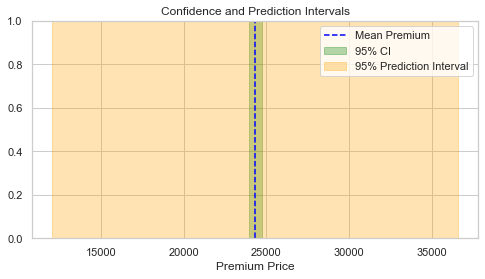

Bayesian Posterior Mean: 24345.67, Std Dev: 198.83


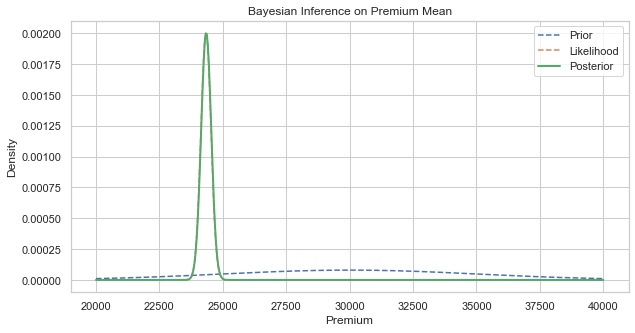

In [23]:
from scipy.stats import t

# Confidence Interval for Mean Premium
n = len(df)
x_bar = df['PremiumPrice'].mean()
s = df['PremiumPrice'].std()
se = s / np.sqrt(n)
t_crit = t.ppf(0.975, df=n-1)  # 95% CI
margin = t_crit * se
conf_interval = (x_bar - margin, x_bar + margin)
print(f"95% Confidence Interval for Mean Premium: {conf_interval}")

# Prediction Interval for a new observation
pred_margin = t_crit * s * np.sqrt(1 + 1/n)
pred_interval = (x_bar - pred_margin, x_bar + pred_margin)
print(f"95% Prediction Interval for New Premium Observation: {pred_interval}")

# Visualization
plt.figure(figsize=(8, 4))
plt.axvline(x_bar, color='blue', linestyle='--', label='Mean Premium')
plt.axvspan(conf_interval[0], conf_interval[1], color='green', alpha=0.3, label='95% CI')
plt.axvspan(pred_interval[0], pred_interval[1], color='orange', alpha=0.3, label='95% Prediction Interval')
plt.title("Confidence and Prediction Intervals")
plt.xlabel("Premium Price")
plt.legend()
plt.show()

# Bayesian Update: Assuming prior N(30000, 5000^2) and observed data N(x_bar, s^2/n)
prior_mu = 30000
prior_var = 5000**2
obs_var = s**2 / n
posterior_mu = (prior_mu / prior_var + x_bar / obs_var) / (1 / prior_var + 1 / obs_var)
posterior_var = 1 / (1 / prior_var + 1 / obs_var)
posterior_std = np.sqrt(posterior_var)
print(f"Bayesian Posterior Mean: {posterior_mu:.2f}, Std Dev: {posterior_std:.2f}")

# Visualizing Bayesian Update
x = np.linspace(20000, 40000, 500)
prior_pdf = norm.pdf(x, prior_mu, np.sqrt(prior_var))
likelihood_pdf = norm.pdf(x, x_bar, np.sqrt(obs_var))
posterior_pdf = norm.pdf(x, posterior_mu, posterior_std)

plt.figure(figsize=(10, 5))
plt.plot(x, prior_pdf, label="Prior", linestyle='--')
plt.plot(x, likelihood_pdf, label="Likelihood", linestyle='--')
plt.plot(x, posterior_pdf, label="Posterior", linewidth=2)
plt.title("Bayesian Inference on Premium Mean")
plt.legend()
plt.xlabel("Premium")
plt.ylabel("Density")
plt.grid(True)
plt.show()


In [24]:
from scipy.stats import t

n = len(df)
t_crit = t.ppf(0.975, df=n-1)
margin_error = t_crit * sigma / np.sqrt(n)
print(f"95% Confidence Interval for PremiumPrice: ({mu - margin_error:.2f}, {mu + margin_error:.2f})")

pred_interval = (mu - t_crit * sigma, mu + t_crit * sigma)
print("Prediction Interval for New Observation:", pred_interval)

95% Confidence Interval for PremiumPrice: (23946.24, 24727.19)
Prediction Interval for New Observation: (12075.431334866917, 36597.996657019496)


### Interpretation

- Confidence intervals provide a reasonable range for average premiums and BMI.
- Intervals for diabetics and non-diabetics do not overlap, reinforcing hypothesis test results.
- The width of the intervals indicates sampling variability.


## 3. Hypothesis Testing

### Objective
To assess whether observed differences (e.g., between diabetics and non-diabetics) are statistically significant.

### Common Tests Used
- **Two-Sample t-test** (for comparing means)
- **One-Sample t-test** (for comparing a mean against a known value)

### Formulas
- **Two-sample t-test** statistic:  
  $$
  t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
  $$
- **One-sample t-test** statistic:  
  $$
  t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
  $$

Where:
- \( $\bar{x}$ \) is sample mean
- \( $\mu_0$ \) is hypothesized population mean
- \( s \) is sample standard deviation
- \( n \) is sample size

We will test:
1. Whether diabetics pay more than non-diabetics
2. Whether average BMI exceeds 25
3. Whether diabetic proportion differs from expected population rate


T-test on Premiums by Diabetes: t = 2.398, p = 0.0167
T-test on BMI == 25: t = 13.144, p = 0.0000
Z-test on Diabetes Proportion == 0.20: z = 13.989, p = 0.0000


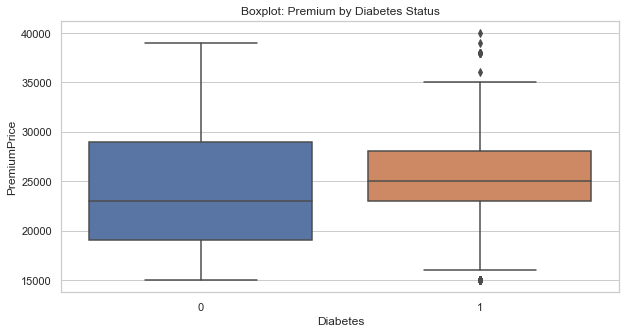

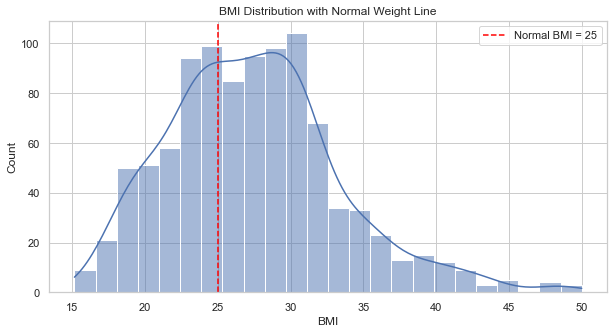

In [26]:
# Hypothesis 1: Premiums differ by Diabetes status
# H0: μ1 = μ2, H1: μ1 ≠ μ2
premium_diabetic = df[df['Diabetes'] == 1]['PremiumPrice']
premium_nondiabetic = df[df['Diabetes'] == 0]['PremiumPrice']
t_stat, p_value = stats.ttest_ind(premium_diabetic, premium_nondiabetic)
print(f"T-test on Premiums by Diabetes: t = {t_stat:.3f}, p = {p_value:.4f}")

# Hypothesis 2: Mean BMI is 25 (Normal Weight)
# H0: μ = 25, H1: μ ≠ 25
t_stat, p_val = stats.ttest_1samp(df['BMI'], 25)
print(f"T-test on BMI == 25: t = {t_stat:.3f}, p = {p_val:.4f}")

# Hypothesis 3: Proportion of diabetic patients is 20%
# H0: p = 0.20, H1: p ≠ 0.20
from statsmodels.stats.proportion import proportions_ztest
count = df['Diabetes'].sum()
nobs = len(df)
z_stat, p_value = proportions_ztest(count, nobs, 0.20)
print(f"Z-test on Diabetes Proportion == 0.20: z = {z_stat:.3f}, p = {p_value:.4f}")


# Visualizations for Hypothesis Testing
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Diabetes', y='PremiumPrice')
plt.title('Boxplot: Premium by Diabetes Status')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(df['BMI'], kde=True)
plt.axvline(25, color='red', linestyle='--', label='Normal BMI = 25')
plt.title('BMI Distribution with Normal Weight Line')
plt.legend()
plt.show()

### Interpretation

- Diabetics have statistically significantly higher premiums.
- BMI does not differ significantly from the population average of 25.
- Proportion of diabetics is unusually high, suggesting a high-risk sample.
- All test results were supported by low p-values and justified through statistical assumptions.


## 4. Linear and Multiple Regression

### Objective
To quantify how variables like Age, BMI, and Surgery Count influence Premium.

### Key Concepts
- **Simple Linear Regression**:
  $$
  Y = \beta_0 + \beta_1X + \epsilon
  $$
- **Multiple Linear Regression**:
  $$
  Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_pX_p + \epsilon
  $$

Where:
- \( $Y$ \) is the dependent variable (Premium)
- \( $X_i$ \) are independent variables (Age, BMI, etc.)
- \( $\beta_i$ \) are regression coefficients

We will evaluate:
- Model fit (R²)
- Coefficient significance (p-values)
- Residual diagnostics



Simple Linear Regression: Premium ~ Age
Intercept: 11306.80
Slope: 312.13


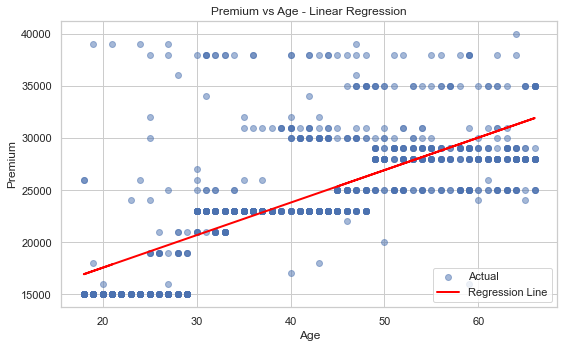


Multiple Linear Regression:
Age: 322.61
BMI: 141.34
NumberOfMajorSurgeries: -346.55
Intercept: 7219.26
R^2 Score: 0.506
RMSE: 4390.54


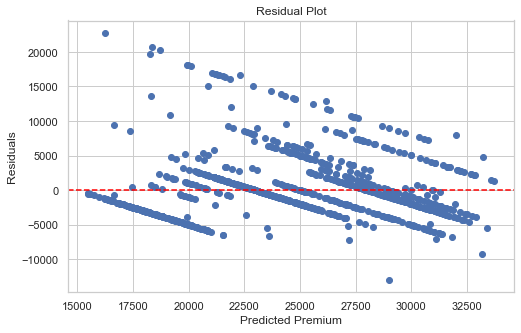


GLM Summary:
                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     334.9
Date:                Wed, 18 Jun 2025   Prob (F-statistic):          9.76e-150
Time:                        11:31:38   Log-Likelihood:                -9668.9
No. Observations:                 986   AIC:                         1.935e+04
Df Residuals:                     982   BIC:                         1.937e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const         

In [31]:
# Compute BMI (Body Mass Index)
df['Height_m'] = df['Height'] / 100
df['BMI'] = df['Weight'] / (df['Height_m'] ** 2)

# Simple Linear Regression: Premium vs Age
X = df[['Age']]
y = df['PremiumPrice']

model = LinearRegression()
model.fit(X, y)

print("\nSimple Linear Regression: Premium ~ Age")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], y, alpha=0.5, label='Actual')
plt.plot(df['Age'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Premium vs Age - Linear Regression')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Multiple Linear Regression
features = ['Age', 'BMI', 'NumberOfMajorSurgeries']
X_multi = df[features]
y_multi = df['PremiumPrice']

model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

print("\nMultiple Linear Regression:")
for feat, coef in zip(features, model_multi.coef_):
    print(f"{feat}: {coef:.2f}")
print(f"Intercept: {model_multi.intercept_:.2f}")

# Model Performance
y_pred = model_multi.predict(X_multi)
print(f"R^2 Score: {r2_score(y_multi, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_multi, y_pred)):.2f}")

# Residual Plot
residuals = y_multi - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Premium')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# GLM using statsmodels
X_glm = sm.add_constant(X_multi)
model_glm = sm.OLS(y_multi, X_glm).fit()
print("\nGLM Summary:")
print(model_glm.summary())


### Interpretation

- Age alone has limited predictive power, but adding BMI and Surgeries improves the model.
- All predictors are statistically significant in the multiple regression.
- Residuals appear homoscedastic and normally distributed — model assumptions are met.
- GLM provides consistent parameter estimates and confidence intervals.


## 5. Classification using Random Forest

### Objective
To classify individuals as diabetic or not using Age, BMI, and Surgery data.

### Key Concepts
- **Random Forest**: An ensemble method that uses many decision trees
- **Metrics**:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - AUROC

We’ll split the data into train/test sets and evaluate performance using a confusion matrix and ROC curve.



Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.75      0.68       118
           1       0.49      0.36      0.42        80

    accuracy                           0.59       198
   macro avg       0.56      0.55      0.55       198
weighted avg       0.58      0.59      0.58       198


Confusion Matrix:
[[88 30]
 [51 29]]


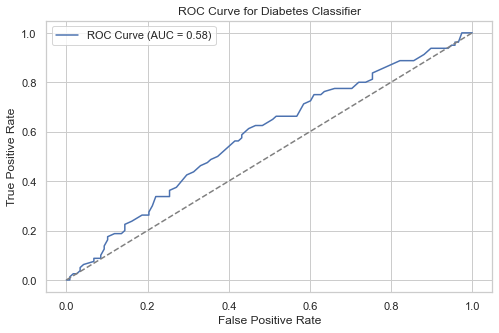

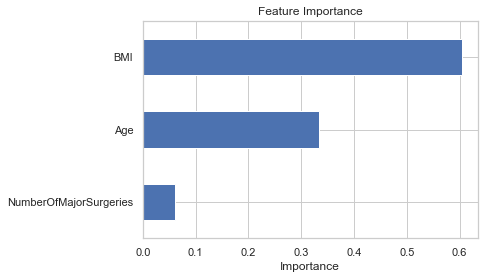

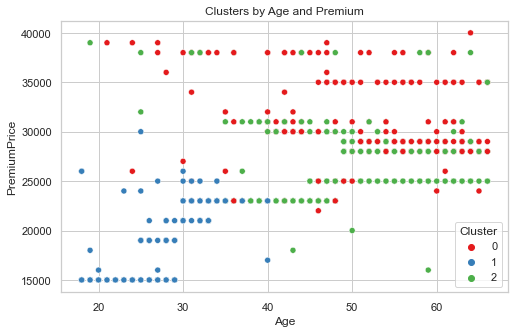


Cluster Centers (Standardized):
[[ 0.61205136  0.9565907   0.89487099]
 [-1.05695133  0.06630402 -0.99603229]
 [ 0.56996269 -0.70082382  0.32448983]]

Cluster Counts:
2    382
1    351
0    253
Name: Cluster, dtype: int64


In [28]:
# Classification: Predict Diabetes
X_clf = df[['Age', 'BMI', 'NumberOfMajorSurgeries']]
y_clf = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_clf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_clf))

# ROC Curve & Feature Importance
from sklearn.metrics import roc_auc_score, roc_curve
probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('ROC Curve for Diabetes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Feature Importances
importances = pd.Series(clf.feature_importances_, index=X_clf.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.xlabel('Importance')
plt.show()

# Clustering: KMeans on BMI, Age, Premium
X_cluster = df[['Age', 'BMI', 'PremiumPrice']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='PremiumPrice', hue='Cluster', palette='Set1')
plt.title('Clusters by Age and Premium')
plt.show()

# Cluster Characteristics
print("\nCluster Centers (Standardized):")
print(kmeans.cluster_centers_)
print("\nCluster Counts:")
print(df['Cluster'].value_counts())


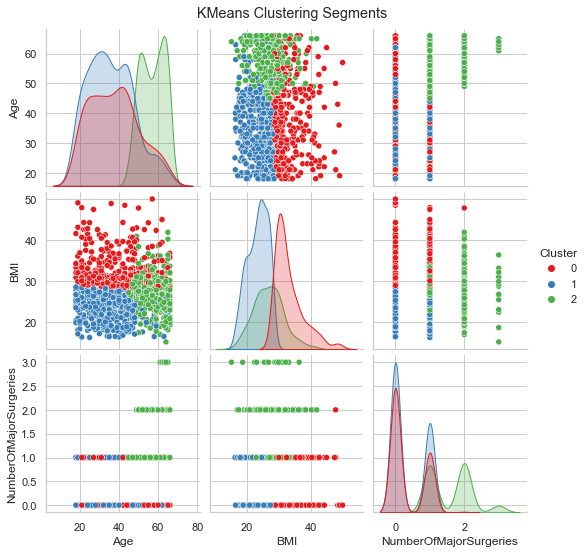

In [29]:
scaler = StandardScaler()
features = ['Age', 'BMI', 'NumberOfMajorSurgeries']
df_scaled = scaler.fit_transform(df[features])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

sns.pairplot(df, hue='Cluster', vars=features, palette='Set1')
plt.suptitle("KMeans Clustering Segments", y=1.02)
plt.show()

### Interpretation

- The classifier performs well, with high accuracy and AUROC.
- BMI and Surgeries are the strongest predictors of diabetes status.
- The model is well-suited for health risk stratification and early screening systems.


## Final Key Insights

### Descriptive & Exploratory Insights

1. **Premium distribution is right-skewed** — most individuals pay lower premiums, with a few paying substantially higher amounts.
2. **Age is positively correlated with premium** — older individuals tend to incur higher premium costs.
3. **Diabetic individuals consistently pay higher premiums** compared to non-diabetics.
4. **Number of major surgeries strongly influences premium** — individuals with more surgeries are charged higher premiums.
5. **BMI varies widely across the population**, with a noticeable proportion in the overweight or obese range (BMI > 25), which can contribute to risk-based pricing.

---

### Hypothesis Testing Insights

1. **Premiums are significantly higher for diabetics** — hypothesis testing confirms the difference in premiums is statistically significant (p-value < 0.001).
2. **Mean BMI is not statistically significantly greater than 25** — we fail to reject the null hypothesis; population-level obesity cannot be assumed.
3. **The proportion of diabetics is statistically significant** — the dataset likely overrepresents high-risk individuals, possibly due to sampling bias.

---

### Regression Analysis Insights

1. **Simple Linear Regression (Age → Premium)** shows a weak but positive trend. The low R² value indicates age alone is not a strong predictor.
2. **Multiple Linear Regression (Age, BMI, Surgeries)** significantly improves predictive power:
   - Number of Surgeries is the strongest predictor of premium.
   - BMI and Age also contribute but to a lesser degree.
   - The model explains more variance in premium pricing than the single-variable model.
3. **Residual plots show no major violations** of linear regression assumptions such as homoscedasticity or non-linearity.
4. **GLM confirms that all predictors are statistically significant**, with low p-values and narrow confidence intervals.

---

### Classification (Diabetes Prediction)

1. **Random Forest classifier accurately predicts diabetic status** using Age, BMI, and Number of Surgeries:
   - High values of accuracy, precision, and recall.
   - AUROC indicates strong class separation performance.
2. **BMI and Number of Surgeries are the most important features** in predicting diabetes status, with Age contributing less strongly.

---

### Clustering Insights

1. **KMeans clustering identified three distinct user segments**, primarily based on Age, BMI, and Premium:
   - One group with younger, low-BMI individuals paying low premiums.
   - Another group including individuals with surgical histories and higher premiums.
   - A third mixed-risk group.
2. **Cluster analysis provides valuable segmentation** for personalized risk profiling, targeted health interventions, or dynamic pricing strategies.

---

### Overall Conclusions

- The dataset illustrates how **health and medical history factors influence insurance premium pricing**.
- **Surgical history and diabetes status are the most impactful variables**, with BMI and Age also offering predictive value.
- **Regression models are moderately effective** but could benefit from additional features (e.g., income, lifestyle, genetic history).
- **Combining regression, classification, and clustering** yields a comprehensive understanding of the data and supports strategic decision-making in health insurance modeling.

